In [4]:
#!pip install pillow
#!pip install matplotlib

In [5]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

from keras.preprocessing.image import ImageDataGenerator

import PIL

import numpy as np
from keras.preprocessing import image
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

Populating the interactive namespace from numpy and matplotlib


Building the CNN
* Two ways of initializing the neural network, either as a sequence of layers or as a graph. 
* CNN is a sequence of layers
* Conv2D for images and Conv3D for videos (add time)
* Add the fully connected layers into a classic ANN
* The problem is non-linear so we need to have non-linearity in the model

In [3]:
# Initialising the CNN
classifier = Sequential()

# Step 1 - Convolution
# 32 = number of filters, start with 2^5=32, then 2^6=64, until 2^7=128
# (3,3) = (rows,columns)
# (64,64,3) = size of our input image
# relu = to avoid (-) values in the feature maps and have non-linearity in the CNN
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))

# Step 2 - Pooling
# pool_size = windows size of the feature map
# use less intensive computational power 
# recommendation size (2,2)
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a second convolutional layer
# 1 CL train 85% and test 75% a difference of 10%
# improve the accuracy of 7% in the test dataset and reduce the diff in train/test
# a common practice is to double the number of feature detectors 32, 64, 128, ...
# 1 CL train 85% and test 82% a difference of 3%
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Step 3 - Flattening
# A huge vector where each node represent an input pixel image 
# Independent from all the pixels around it, only contains information from itself
# With a convolutional step we can codify spatial structure around the pixel
classifier.add(Flatten())

# Step 4 - Full connection
# Classic ANN composed of fully connected layers
# Convert the input image into one dimensional vector that contains information of the spatial structure
# Use the output (flatten huge vector) as an input of a ANN
# too-small to make the classifier a good model 
# too-big to make the classifier too highly compute-intensive
classifier.add(Dense(units = 128, activation = 'relu'))
# output layer
# sigmoid - to return probabilities of a binary outcome
classifier.add(Dense(units = 1, activation = 'sigmoid'))

# Compiling the CNN
# Stochastic gradient descent algorithm = adam
# Binary Cross Entropy corresponds to the logarithmic loss used in classification problem
# Since the output is binary, thus, a binary cross entropy loss function is needed
# Performance metric = accuracy
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

Fitting the CNN to the images
* Good performance on train dataset and poor performance on test dataset -> overfit
* Overfitting is also caused for few data train
* Can capture the patterns but fail at generalization
* More real data or data augmentation to produce synthetic data
* Rotate, flip, shift
* Shear mapping is a linear map that displaces each point in fixed direction, by an amount proportional to its signed distance from the line that is parallel to that direction and goes through the origin.


In [4]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)

* rescale the images to be between 0 and 1
* shear_range for some random transvections
* zoom changes
* horizontal flip
* batch_size: some random samples of our images will be included
* batch_size, contains the number of images that will go through the CNN after the weight will be updated

In [5]:
training_set = train_datagen.flow_from_directory('./dataset/training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 8000 images belonging to 2 classes.


In [6]:
test_set = test_datagen.flow_from_directory('./dataset/test_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 2000 images belonging to 2 classes.


How to improve accuracy?
* Add another convolutional layer
* Add another fully connected layer
* Increase accuracy and decrease loss
* Increase the size of the images

In [7]:
classifier.fit_generator(training_set,
                         steps_per_epoch = 8000,
                         epochs = 2,
                         validation_data = test_set,
                         validation_steps = 2000)

Epoch 1/2
8000/8000 [==============================] - 1104s 138ms/step - loss: 0.3891 - accuracy: 0.8153 - val_loss: 0.2711 - val_accuracy: 0.8091
Epoch 2/2
8000/8000 [==============================] - 986s 123ms/step - loss: 0.1594 - accuracy: 0.9362 - val_loss: 1.0453 - val_accuracy: 0.7991


In [22]:
print(training_set.class_indices)

{'cats': 0, 'dogs': 1}


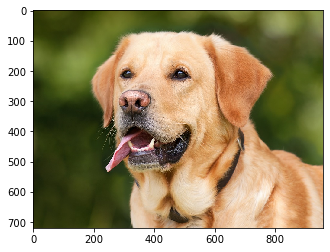

In [6]:
img=mpimg.imread('./dataset/single_prediction/cat_or_dog_1.jpg')
imgplot = plt.imshow(img)
plt.show()

In [24]:
test_image = image.load_img('./dataset/single_prediction/cat_or_dog_1.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
classifier.predict(test_image)

array([[1.]], dtype=float32)

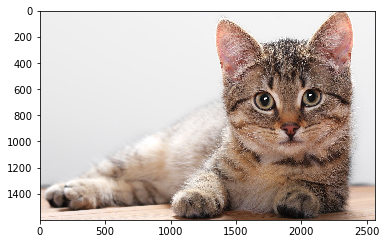

In [7]:
img=mpimg.imread('./dataset/single_prediction/cat_or_dog_2.jpg')
imgplot = plt.imshow(img)
plt.show()

In [23]:
test_image = image.load_img('./dataset/single_prediction/cat_or_dog_2.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
classifier.predict(test_image)

array([[0.]], dtype=float32)